In [183]:
from sympy import *
import sympy

(3*omega/4 + sin(omega)*cos(omega)**3/2 + 3*sin(omega)*cos(omega)/4)/(2*omega)

(omega + sin(omega)*cos(omega))/(2*omega)

(4*omega**2 + omega*sin(4*omega) + 2*cos(2*omega)**2 - 2)/(32*omega**2)

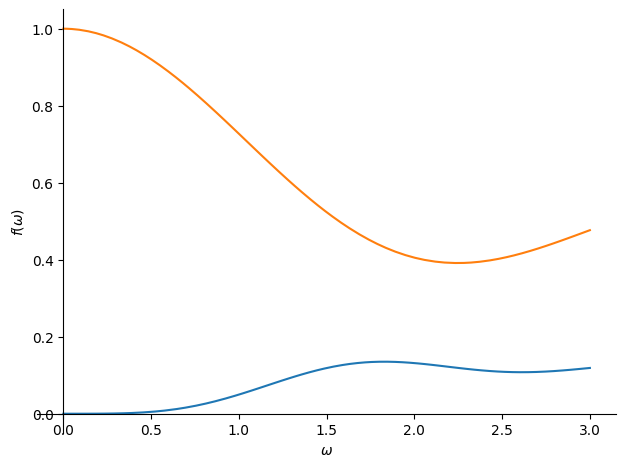

In [301]:
theta,xi = symbols("theta xi")
p,mu,alpha,omega,m = symbols("p mu alpha omega m",positive=True)
cp = integrate(cos(theta)**4,(theta,-omega,omega))/(2*omega)
kp = integrate(cos(theta)**2,(theta,-omega,omega))/(2*omega)
a = simplify(cp-kp**2)
display(cp,kp,a)
plot(a,kp,(omega,0,3))

In [323]:
optimistic = alpha*kp**m
pesimistic = xi*(1-kp**m)
bound = simplify(a*(optimistic + pesimistic)**2)
dbound = bound.diff(xi)
optimalxi = solve(dbound,xi)[0]
display(optimalxi)
display(bound)

alpha*(2*omega + sin(2*omega))**m/(-2**(2*m)*omega**m + (2*omega + sin(2*omega))**m)

(1/(4*omega**2))**m*(alpha*(omega + sin(2*omega)/2)**m - xi*(-(2*omega)**m + (omega + sin(2*omega)/2)**m))**2*(4*omega**2 + omega*sin(4*omega) + 2*cos(2*omega)**2 - 2)/(32*omega**2)

In [412]:
omega_optimal = mu * m**(-3/2)
dt_optimal = mu* m**(-1/2)
display(omega_optimal,dt_optimal)

mu/m**1.5

mu/m**0.5

In [419]:
fixedbound = bound.subs([
    # (alpha,(1-2*dt_optimal**2)),
    (alpha,1),
    (xi,-2),
    (omega,omega_optimal)
    ])
                    
display(fixedbound)
# display(fixedbound.subs(mu,1e-2))

m**3.0*(m**3.0/(4*mu**2))**m*(-2*(2*mu/m**1.5)**m + 3*(mu/m**1.5 + sin(2*mu/m**1.5)/2)**m)**2*(4*mu**2/m**3.0 + mu*sin(4*mu/m**1.5)/m**1.5 + 2*cos(2*mu/m**1.5)**2 - 2)/(32*mu**2)

In [418]:
series(fixedbound.subs(mu,1e-2),m,sympy.oo)

NotImplementedError: 

In [398]:
fun = lambdify(m,expand(fixedbound.subs(mu,1)))

In [399]:
import numpy as np
import plotly.express as px
ms = np.arange(1e2,1e4)

m**3.0*(m**1.5*(m**(-1.5) + sin(m**(-1.5))*cos(m**(-1.5)))/2)**(2*m)*(4/m**3.0 + sin(4/m**1.5)/m**1.5 + 2*cos(2/m**1.5)**2 - 2)/32

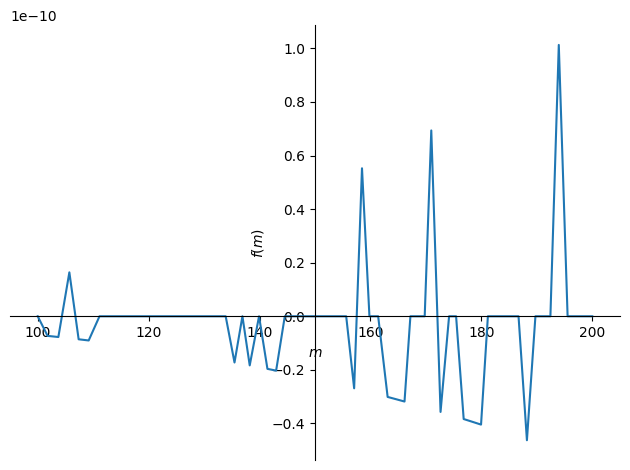

In [415]:
simp=(a*kp**(2*m)).subs([(omega,omega_optimal),(mu,1)])
display(simp)
plot(simp,(m,1e2,2e2))